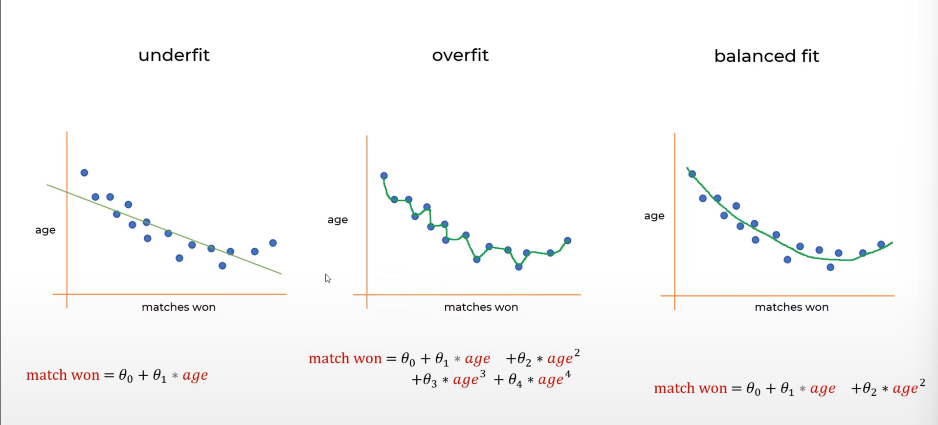
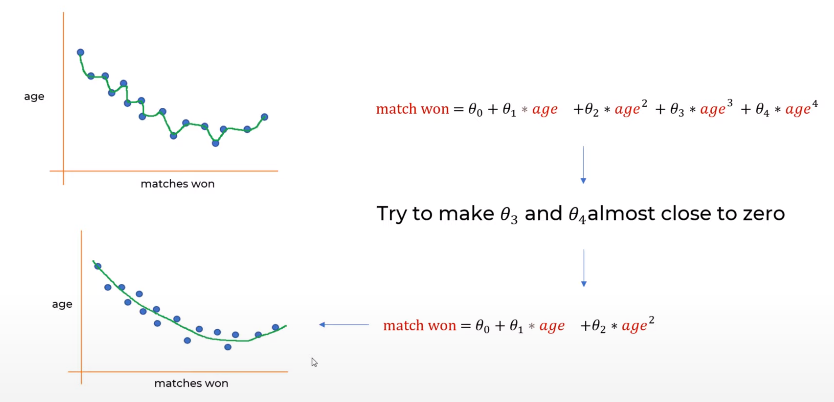

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# Suppress Warnings for clean notebook
#import warnings
#warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('lec18.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [10]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [11]:
dataset.shape

(34857, 21)

In [12]:
# discarding not essential comlumns

cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [13]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [14]:
dataset.shape

(34857, 15)

In [17]:
dataset.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [18]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

C:\Users\risha\AppData\Local\Temp\ipykernel_17732\3025843212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)


In [19]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

C:\Users\risha\AppData\Local\Temp\ipykernel_17732\2006748632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
C:\Users\risha\AppData\Local\Temp\ipykernel_17732\2006748632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())


Drop NA values of Price, since it's our predictive variable we won't impute it

In [20]:
dataset.dropna(inplace=True)

C:\Users\risha\AppData\Local\Temp\ipykernel_17732\2639109627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


In [21]:
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [22]:
# drop_first to avoid dummy varaible trap
dataset = pd.get_dummies(dataset, drop_first=True)

In [23]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
dir(dataset)

['Bathroom',
 'Bedroom2',
 'BuildingArea',
 'Car',
 'Distance',
 'Landsize',
 'Price',
 'Propertycount',
 'Rooms',
 'Suburb_Aberfeldie',
 'Suburb_Albanvale',
 'Suburb_Albion',
 'Suburb_Alphington',
 'Suburb_Altona',
 'Suburb_Ardeer',
 'Suburb_Armadale',
 'Suburb_Ashburton',
 'Suburb_Ashwood',
 'Suburb_Aspendale',
 'Suburb_Attwood',
 'Suburb_Balaclava',
 'Suburb_Balwyn',
 'Suburb_Bayswater',
 'Suburb_Beaconsfield',
 'Suburb_Beaumaris',
 'Suburb_Bellfield',
 'Suburb_Bentleigh',
 'Suburb_Berwick',
 'Suburb_Blackburn',
 'Suburb_Bonbeach',
 'Suburb_Boronia',
 'Suburb_Braybrook',
 'Suburb_Brighton',
 'Suburb_Broadmeadows',
 'Suburb_Brookfield',
 'Suburb_Brooklyn',
 'Suburb_Brunswick',
 'Suburb_Bulla',
 'Suburb_Bulleen',
 'Suburb_Bullengarook',
 'Suburb_Bundoora',
 'Suburb_Burnley',
 'Suburb_Burnside',
 'Suburb_Burwood',
 'Suburb_Cairnlea',
 'Suburb_Camberwell',
 'Suburb_Campbellfield',
 'Suburb_Canterbury',
 'Suburb_Carlton',
 'Suburb_Carnegie',
 'Suburb_Carrum',
 'Suburb_Caulfield',
 'Subur

In [29]:
X = dataset.drop('Price', axis='columns')
y = dataset['Price']

In [32]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [35]:
reg.fit(train_X,train_y)

LinearRegression()

In [36]:
reg.score(test_X,test_y)

0.1385368316156511

In [37]:
reg.score(train_X,train_y)

0.6827792395792723

Here training score is 68% but test score is 13.85% which is very low

this shows that our model is clearly **OVERFITTING** the dataset

# Using Lasso (L1 Regularized) Regression Model

In [38]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

C:\Users\risha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [39]:
lasso_reg.score(test_X, test_y)


0.6636111369404489

In [40]:
lasso_reg.score(train_X, train_y)

0.6766985624766824

# Using Ridge (L2 Regularized) Regression Model

In [42]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [43]:
ridge_reg.score(test_X, test_y)

0.6670848945194956

In [44]:
ridge_reg.score(train_X, train_y)

0.6622376739684328

We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too